In [27]:
from datasets import *
from models import *

In [28]:
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable

In [29]:
import matplotlib.pyplot as plt

In [30]:
cuda = True if torch.cuda.is_available() else False

In [31]:
#Global Variables
CHANNELS = 3
IMG_SIZE = 128
DATASET_NAME = 'img_align_celeba'
BATCH_SIZE = 8
N_CPU = 4
MASK_SIZE = 64

In [32]:
generator = Generator(channels=CHANNELS)
generator1=Generator(channels=CHANNELS)
generator2=Generator(channels=CHANNELS)
generator3=Generator(channels=CHANNELS)
discriminator = Discriminator(channels=CHANNELS)

In [33]:
print("Loading saved models")
generator = torch.load(os.path.join( './models/gen_196.pt'),map_location=torch.device('cpu'))
generator1=torch.load(os.path.join( './models/gen_20.pt'),map_location=torch.device('cpu'))
generator2=torch.load(os.path.join( './models/gen_175.pt'),map_location=torch.device('cpu'))
generator3=torch.load(os.path.join( './models/gen.pt'),map_location=torch.device('cpu'))
discriminator =  torch.load(os.path.join('./models/disc.pt'),map_location=torch.device('cpu'))
print("modles loaded")

Loading saved models
modles loaded


In [34]:
if cuda:
    generator.cuda()
    discriminator.cuda()

In [35]:
# Dataset loader
transforms_ = [
    transforms.Resize((IMG_SIZE, IMG_SIZE), Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
]
dataloader = DataLoader(
    ImageDataset("../Desktop/PyTorch-GAN/data/%s" % DATASET_NAME, transforms_=transforms_),
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=N_CPU,
)
test_dataloader = DataLoader(
    ImageDataset("../Desktop/PyTorch-GAN/data/%s" % DATASET_NAME, transforms_=transforms_, mode="val"),
    batch_size=1,
    shuffle=True,
    num_workers=1,
)

In [36]:
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

In [37]:
def save_sample(generator_var):
    samples, masked_samples, i = next(iter(test_dataloader))
    samples = Variable(samples.type(Tensor))
    masked_samples = Variable(masked_samples.type(Tensor))
    i = i[0].item()  # Upper-left coordinate of mask
    # Generate inpainted image
    gen_mask = generator_var(masked_samples)
    filled_samples = masked_samples.clone()
    filled_samples[:, :, i : i + MASK_SIZE, i : i + MASK_SIZE] = gen_mask
    # Save sample
    sample = torch.cat((masked_samples.data, filled_samples.data, samples.data), -2)
    return sample

In [38]:
result = save_sample(generator).cpu().squeeze().permute(1,2,0)

In [39]:
result

tensor([[[ 0.8980,  0.8980,  0.8980],
         [ 0.8980,  0.8980,  0.8980],
         [ 0.8980,  0.8980,  0.8980],
         ...,
         [ 0.9765,  0.9686,  0.9529],
         [ 1.0000,  0.9922,  0.9765],
         [ 0.9922,  0.9843,  0.9686]],

        [[ 0.8980,  0.8980,  0.8980],
         [ 0.8980,  0.8980,  0.8980],
         [ 0.8980,  0.8980,  0.8980],
         ...,
         [ 0.9765,  0.9686,  0.9529],
         [ 1.0000,  0.9922,  0.9765],
         [ 0.9922,  0.9843,  0.9686]],

        [[ 0.8980,  0.8980,  0.8980],
         [ 0.8980,  0.8980,  0.8980],
         [ 0.8980,  0.8980,  0.8980],
         ...,
         [ 0.9765,  0.9686,  0.9529],
         [ 1.0000,  0.9922,  0.9765],
         [ 0.9922,  0.9843,  0.9686]],

        ...,

        [[ 0.7882,  0.2784, -0.0275],
         [ 0.7804,  0.2784, -0.0275],
         [ 0.7804,  0.2863, -0.0196],
         ...,
         [ 0.1216, -0.3255, -0.5608],
         [ 0.1216, -0.3020, -0.5608],
         [ 0.1294, -0.2941, -0.5608]],

        [[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


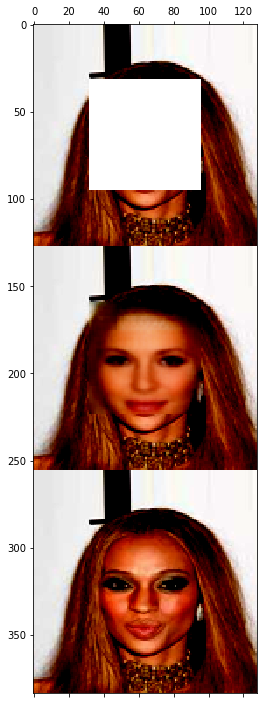

In [40]:
plt.matshow(result)
plt.show() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


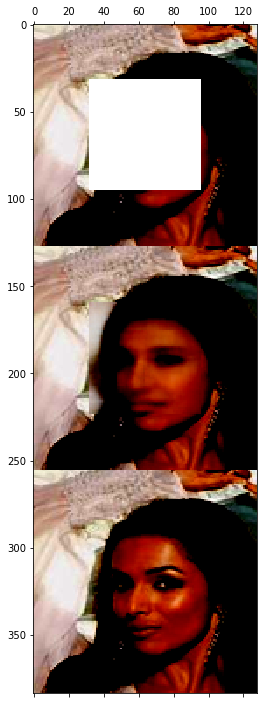

In [41]:
result = save_sample(generator1).cpu().squeeze().permute(1,2,0)
plt.matshow(result)
plt.show() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


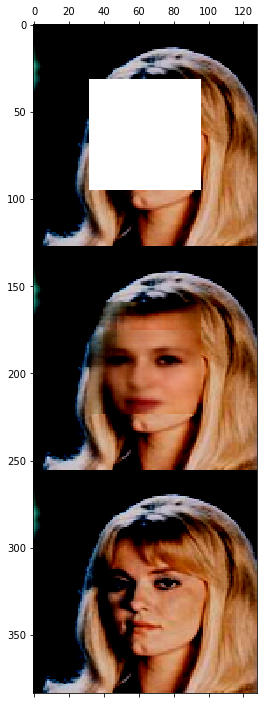

In [42]:
result = save_sample(generator3).cpu().squeeze().permute(1,2,0)
plt.matshow(result)
plt.show() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


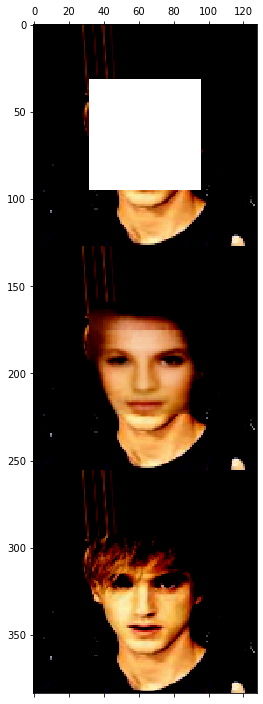

In [43]:
result = save_sample(generator2).cpu().squeeze().permute(1,2,0)
plt.matshow(result)
plt.show() 